In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv('Occupancy_Estimation.csv')

In [3]:
data.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [4]:
data.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [5]:
data.shape

(10129, 19)

In [6]:
data = data.drop(['Date', 'Time'], axis=1)

In [7]:
X = data.drop([ 'Room_Occupancy_Count'], axis=1)

In [8]:
X.head()

S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0    24.94    24.75    24.56    25.38       121        34        53        40   
1    24.94    24.75    24.56    25.44       121        33        53        40   
2    25.00    24.75    24.50    25.44       121        34        53        40   
3    25.00    24.75    24.56    25.44       121        34        53        40   
4    25.00    24.75    24.56    25.44       121        34        54        40   

   S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  S6_PIR  \
0      0.08      0.19      0.06      0.06     390      0.769231       0   
1      0.93      0.05      0.06      0.06     390      0.646154       0   
2      0.43      0.11      0.08      0.06     390      0.519231       0   
3      0.41      0.10      0.10      0.09     390      0.388462       0   
4      0.18      0.06      0.06      0.06     390      0.253846       0   

   S7_PIR  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
lbls = data['Room_Occupancy_Count']

In [10]:
print(lbls.shape)

(10129,)


In [11]:
X.describe(include='all')

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  
count  10129.000000  
mean       0.079574  
std        0.270645  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [12]:
print("Null value counts: ")
X.isna().sum()

Null value counts: 


S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light        0
S2_Light        0
S3_Light        0
S4_Light        0
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2          0
S5_CO2_Slope    0
S6_PIR          0
S7_PIR          0
dtype: int64

<AxesSubplot:>

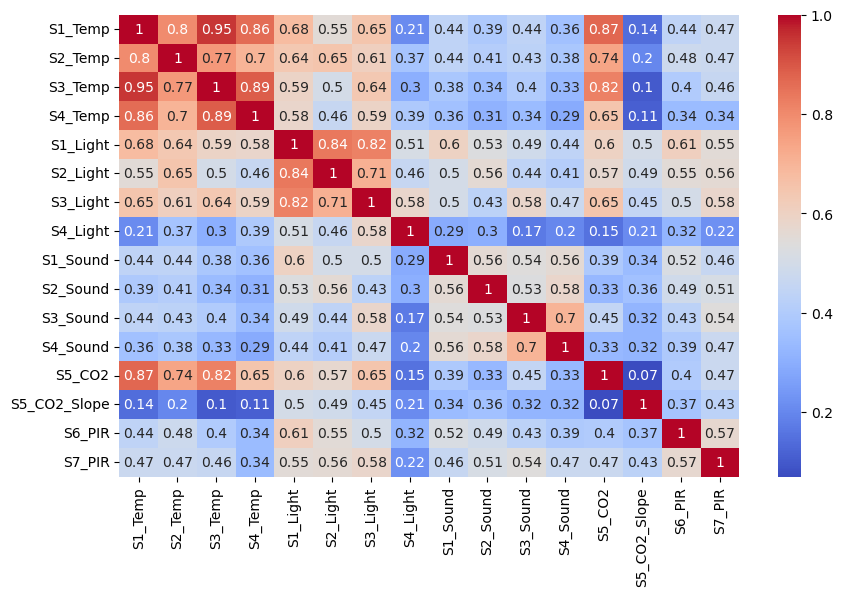

In [13]:
corr_matrix = X.corr(method = 'pearson').round(2)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

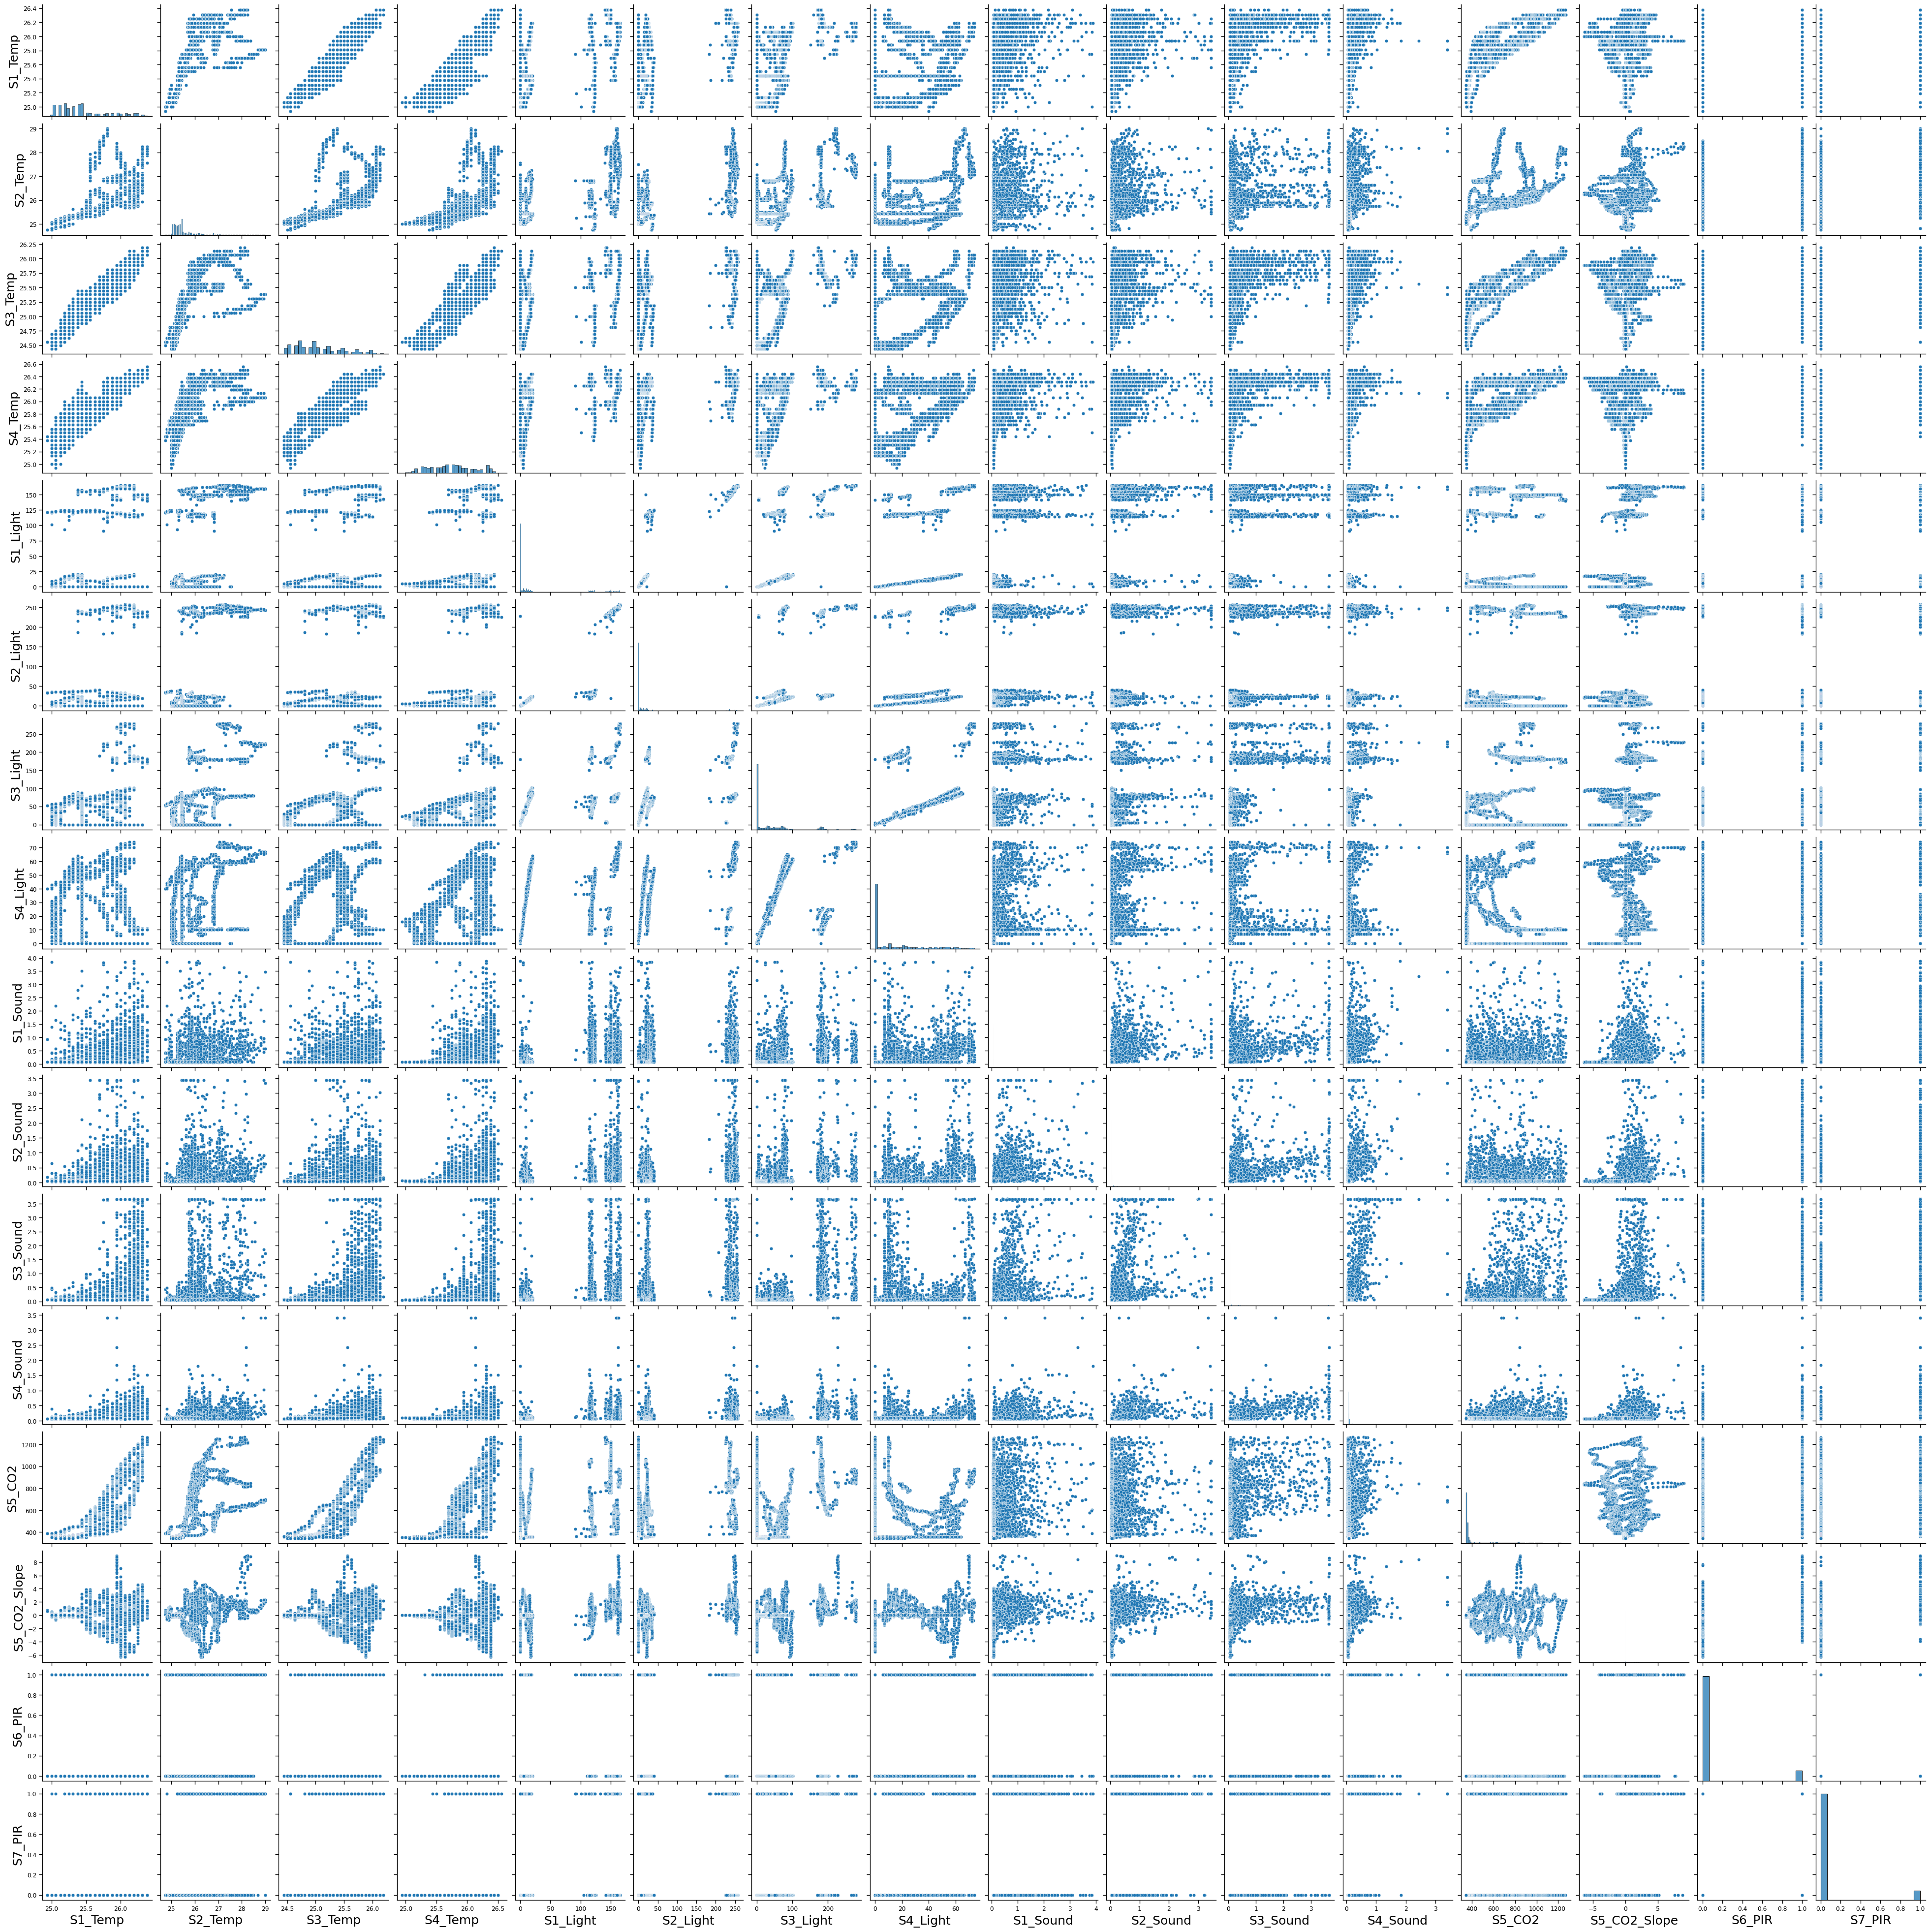

In [14]:
sns.set_context("paper", rc={"axes.labelsize":18})
sns.pairplot(X)

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


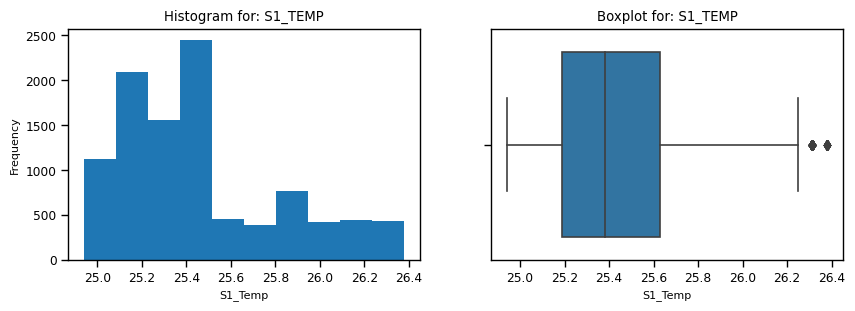

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


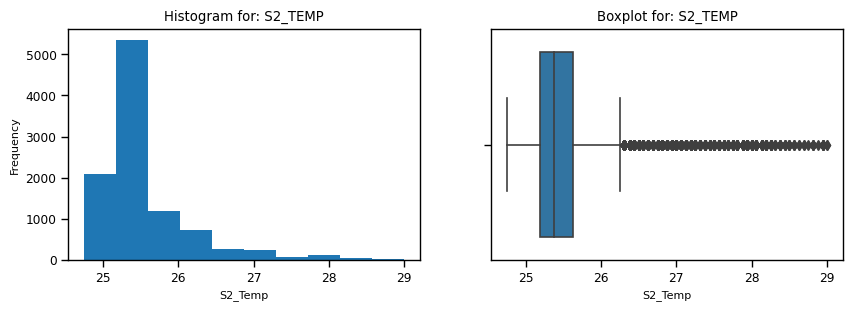

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


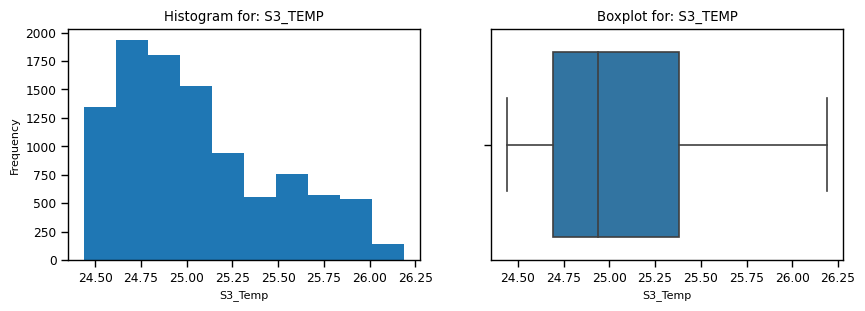

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


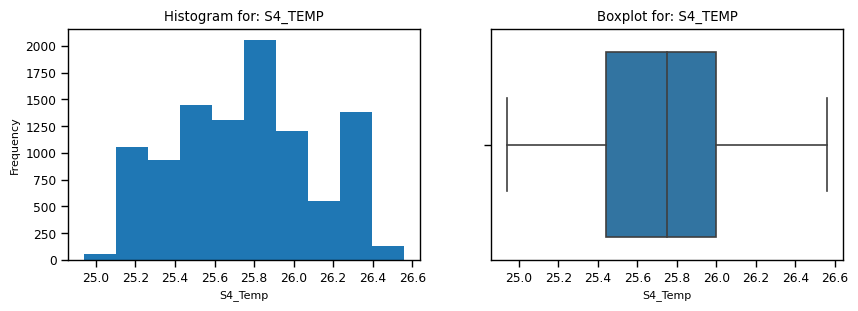

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


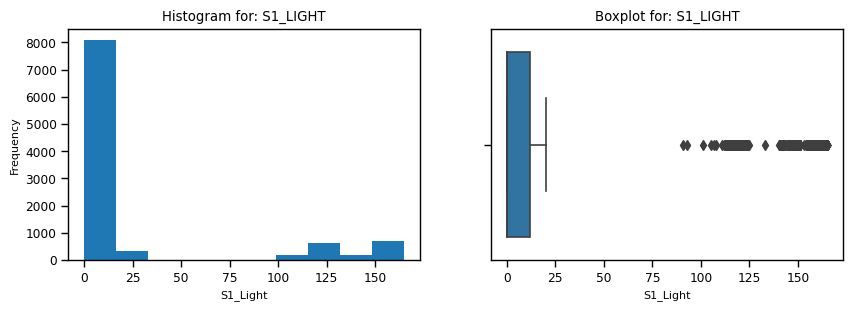

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


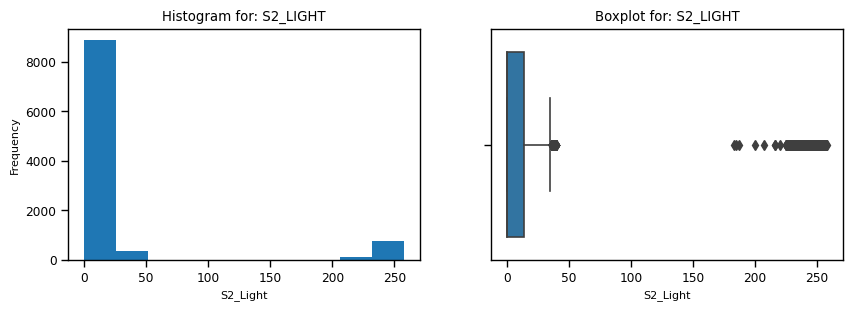

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


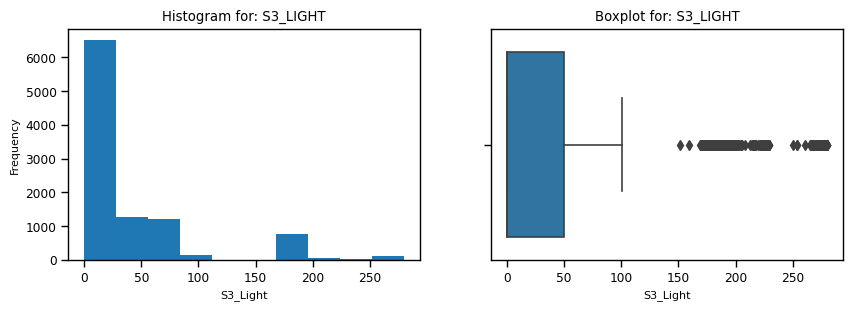

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


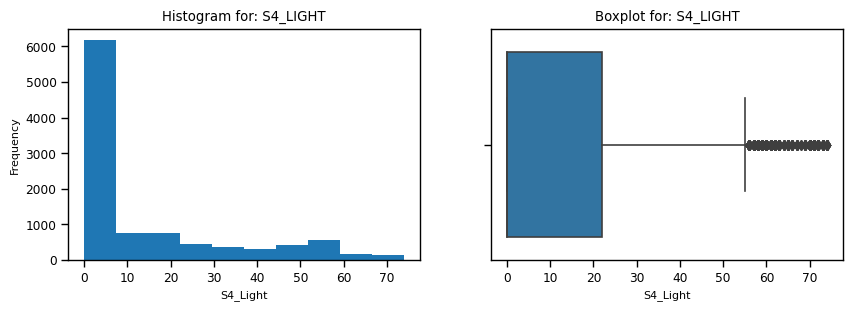

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


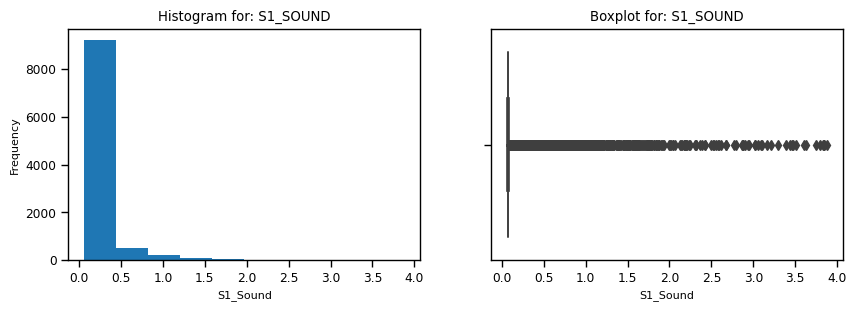

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


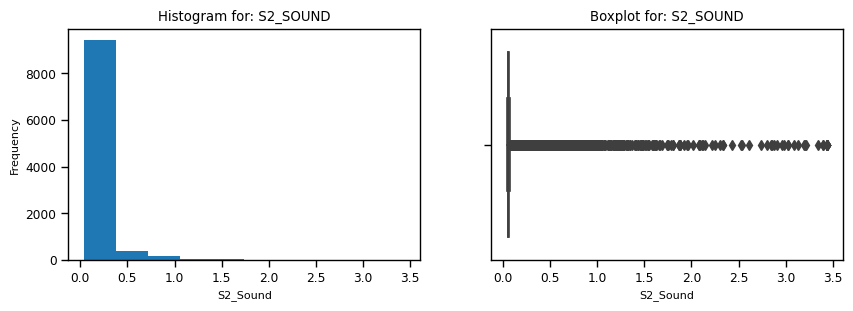

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


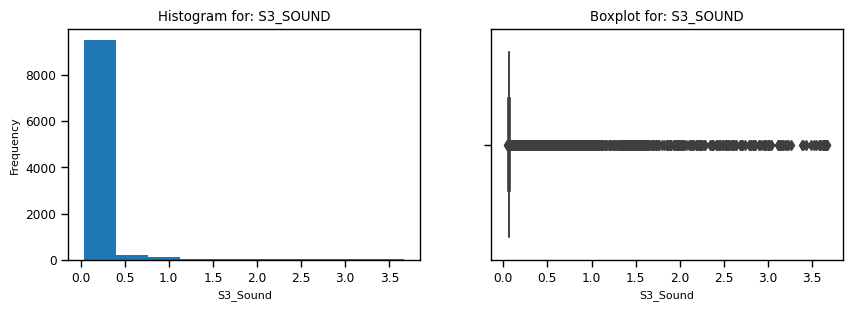

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


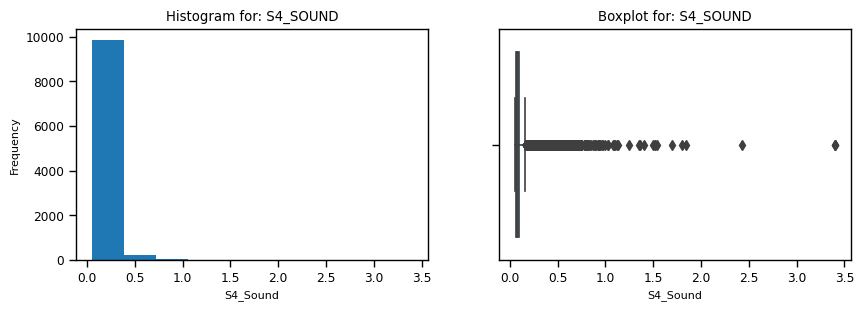

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


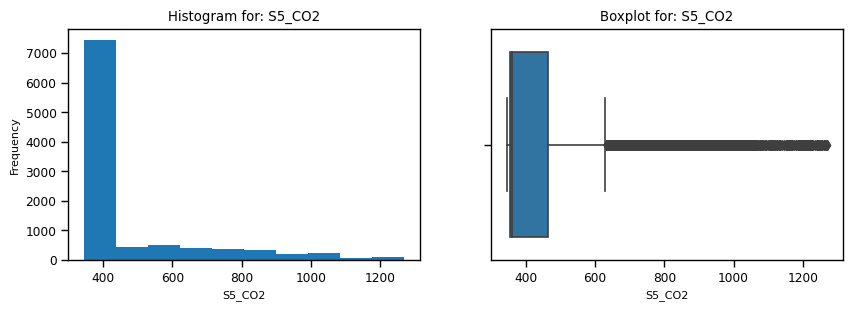

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


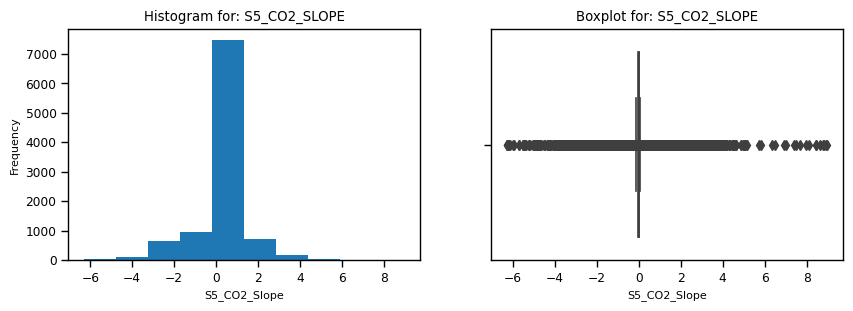

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


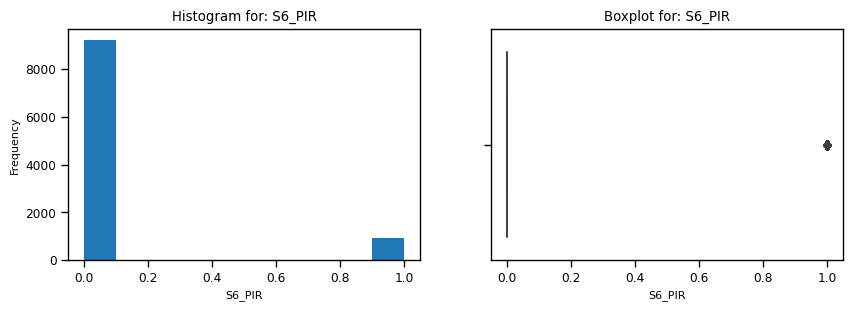

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


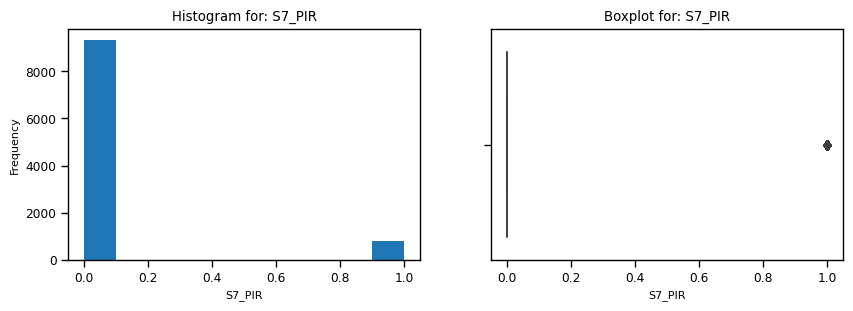

In [14]:
for col_name, col_data in X.iteritems():
    #ploting histogram 
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    col_data.plot(kind='hist')
    plt.xlabel(col_name, fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.title("Histogram for: {}". format(col_name.upper()))
    
    #ploting boxplot
    plt.subplot(1,2,2)
    sns.boxplot(col_data)
    plt.xlabel(col_name, fontsize=8)
    # plt.ylabel("Frequency", fontsize=8)
    plt.title("Boxplot for: {}". format(col_name.upper()))
    
    
    plt.show()

In [17]:
def sklearn_LR(dataframe, regu='l2'):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    
    X = np.array(dataframe.iloc[:, :-1])
    y = np.array(dataframe.iloc[:, -1:])
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123, stratify=y)
    
    if regu =='l2':
        clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    elif regu == 'l1':
        clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    from sklearn.metrics import classification_report
    target_names = ['#people = 0', '#people = 1', '#people = 2', '#people = 3']
    print(classification_report(y_test, y_pred, target_names = target_names))
    

In [18]:
print("> L2 Regularization: ")
sklearn_LR(data)
print("> L1 Regularization: ")
sklearn_LR(data, regu='l1')

> L2 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

              precision    recall  f1-score   support

 #people = 0       0.98      1.00      0.99      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.94      0.88      0.91       247
 #people = 3       0.81      0.70      0.75       229

    accuracy                           0.97      3343
   macro avg       0.93      0.89      0.91      3343
weighted avg       0.97      0.97      0.97      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.97      0.91      0.94       247
 #people = 3       0.90      0.92      0.91       229

    accuracy                           0.99      3343
   macro avg       0.97      0.96      0.96      3343
weighted avg       0.99      0.99      0.99      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature Representation Techniques

## 1. Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [20]:
scaled_x = preprocessing.StandardScaler().fit_transform(X)

In [21]:
pca = PCA()
pca_data = pca.fit_transform(scaled_x)

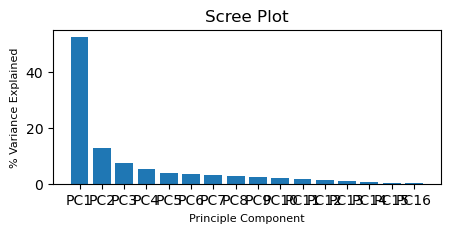

In [22]:
# Scree Plot
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(5,2))
plt.bar(x=labels,height=per_var)
plt.ylabel('% Variance Explained', fontsize=8)
plt.xlabel('Principle Component', fontsize=8)
plt.title('Scree Plot')
plt.show()

From PCA % variance explained, we see the first two component can explain well (more than 60%). 

Text(0.5, 1.0, 'PCA feature representation with 2 dimension')

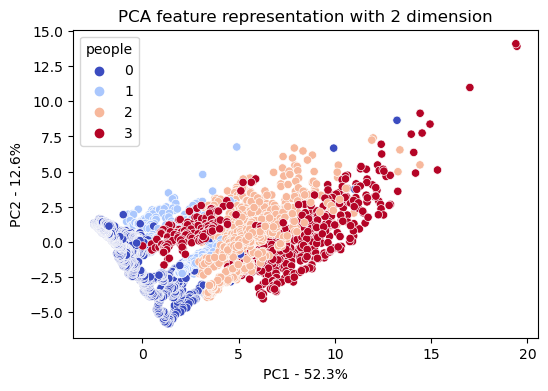

In [23]:
# n_components = 2
pca1 = PCA(n_components = 2)
pca_model = pca1.fit(scaled_x)
pca1_x = pca1.fit_transform(scaled_x)

# create dataframe using the PC components
pca1_df = pd.DataFrame(data = pca1_x, columns = ['PC1', 'PC2'])
pca1_df['people'] = lbls
pca1_df.head()

# Vizualize PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca1_df, x="PC1", y="PC2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('PC1 - {}%'.format(per_var[0]), fontsize=10)
plt.ylabel('PC2 - {}%'.format(per_var[1]), fontsize=10)
plt.title("PCA feature representation with 2 dimension")

In [24]:
print("> L2 Regularization: ")
sklearn_LR(pca1_df)
print("> L1 Regularization: ")
sklearn_LR(pca1_df,  regu='l1')

> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      0.99      0.99      2716
 #people = 1       0.59      0.58      0.59       151
 #people = 2       0.75      0.67      0.71       247
 #people = 3       0.69      0.70      0.70       229

    accuracy                           0.93      3343
   macro avg       0.75      0.74      0.75      3343
weighted avg       0.93      0.93      0.93      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.97      1.00      0.98      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.47      0.46      0.46       247
 #people = 3       0.53      0.68      0.59       229

    accuracy                           0.89      3343
   macro avg       0.49      0.53      0.51      3343
weighted avg       0.86      0.89      0.87      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

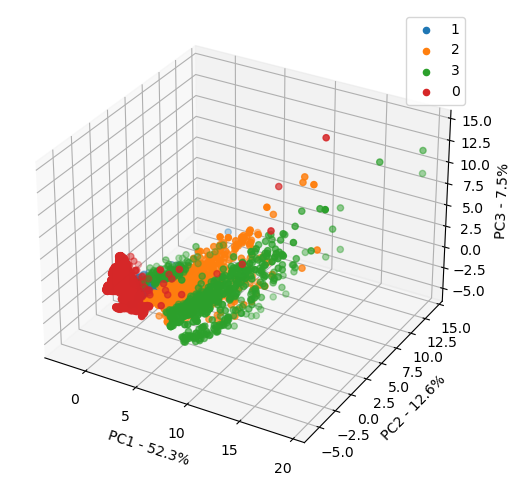

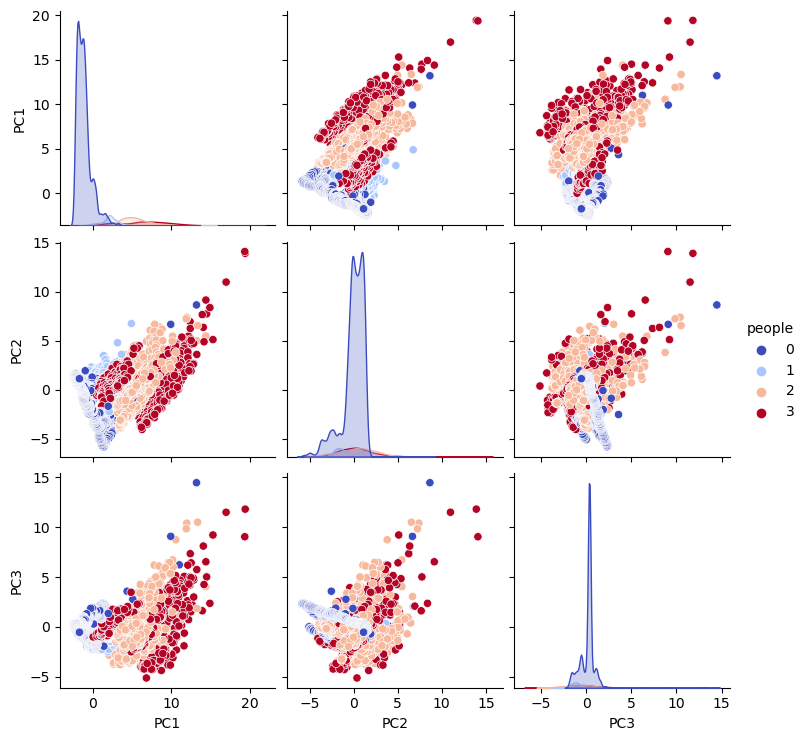

In [25]:
# n_components = 3
pca2 = PCA(n_components = 3)
pca_model2 = pca2.fit(scaled_x)
pca2_data = pca2.fit_transform(scaled_x)

# create dataframe using the PC components
pca2_df = pd.DataFrame(data = pca2_data, columns = ['PC1','PC2', 'PC3'])
pca2_df['people'] = lbls

# Vizualize 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('PC1 - {}%'.format(per_var[0]), fontsize=10)
ax.set_ylabel('PC2 - {}%'.format(per_var[1]), fontsize=10)
ax.set_zlabel('PC3 - {}%'.format(per_var[2]), fontsize=10)

for p in pca2_df.people.unique():
    ax.scatter(pca2_df.PC1[pca2_df.people==p], 
               pca2_df.PC2[pca2_df.people==p], 
               pca2_df.PC3[pca2_df.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# pair plot among the components 
sns.pairplot(pca2_df, hue="people", palette="coolwarm")


In [26]:
print("> L2 Regularization: ")
sklearn_LR(pca2_df)
print("> L1 Regularization: ")
sklearn_LR(pca2_df, regu='l1')

> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      0.99      0.99      2716
 #people = 1       0.67      0.64      0.66       151
 #people = 2       0.75      0.68      0.71       247
 #people = 3       0.70      0.71      0.70       229

    accuracy                           0.93      3343
   macro avg       0.78      0.76      0.76      3343
weighted avg       0.93      0.93      0.93      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.96      0.99      0.98      2716
 #people = 1       0.49      0.13      0.21       151
 #people = 2       0.49      0.38      0.43       247
 #people = 3       0.52      0.67      0.58       229

    accuracy                           0.89      3343
   macro avg       0.61      0.54      0.55      3343
weighted avg       0.87      0.89      0.87      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# n_components = 9
pca_ = PCA(n_components = 9)
pca_model_ = pca_.fit(scaled_x)
pca_data_ = pca_.fit_transform(scaled_x)

# create dataframe using the PC components
pca_df_ = pd.DataFrame(data = pca_data)
pca_df_['people'] = lbls

In [28]:
print("> L2 Regularization: ")
sklearn_LR(pca_df_)
print("> L1 Regularization: ")
sklearn_LR(pca_df_, regu='l1')

> L2 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.98      0.94      0.96       247
 #people = 3       0.94      0.97      0.95       229

    accuracy                           0.99      3343
   macro avg       0.98      0.98      0.98      3343
weighted avg       0.99      0.99      0.99      3343

> L1 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.97      0.90      0.94       247
 #people = 3       0.90      0.96      0.93       229

    accuracy                           0.99      3343
   macro avg       0.97      0.96      0.96      3343
weighted avg       0.99      0.99      0.99      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2. LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Text(0.5, 1.0, 'LDA feature representation with 2 dimension')

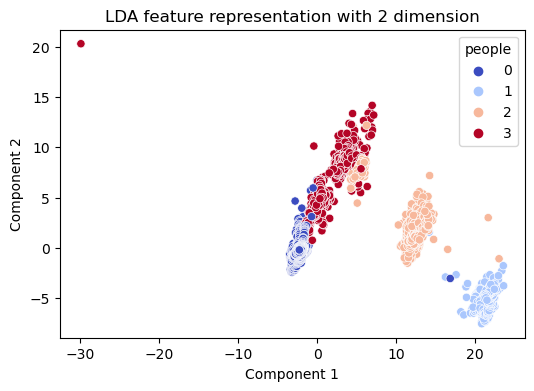

In [30]:
# n_components = 2
lda = LinearDiscriminantAnalysis(n_components = 2)
lda_model = lda.fit(scaled_x, lbls)
lda_x = lda_model.transform(scaled_x)

# create dataframe using the PC components
lda_df = pd.DataFrame(data = lda_x, columns = ['Com1', 'Com2'])
lda_df['people'] = lbls

# Vizualize 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=lda_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("LDA feature representation with 2 dimension")

In [96]:
print("> L2 Regularization: ")
sklearn_LR(lda_df)
print("> L1 Regularization: ")
sklearn_LR(lda_df, regu='l1')

> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.98      0.94      0.96       247
 #people = 3       0.94      0.97      0.95       229

    accuracy                           0.99      3343
   macro avg       0.98      0.98      0.98      3343
weighted avg       0.99      0.99      0.99      3343

> L1 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.97      0.90      0.94       247
 #people = 3       0.90      0.96      0.93       229

    accuracy                           0.99      3343
   macro avg       0.97      0.96      0.96      3343
weighted avg       0.99      0.99      0.99      3343



Considering 3 components

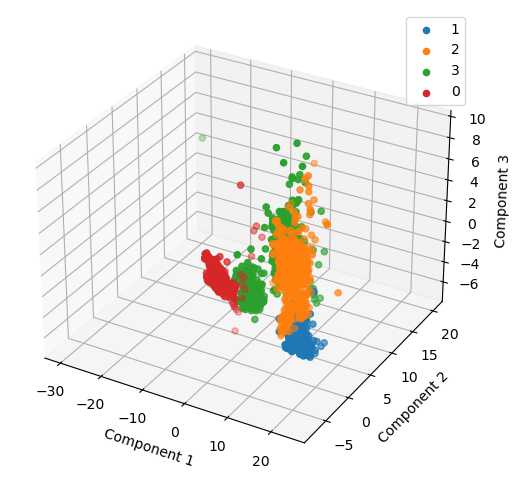

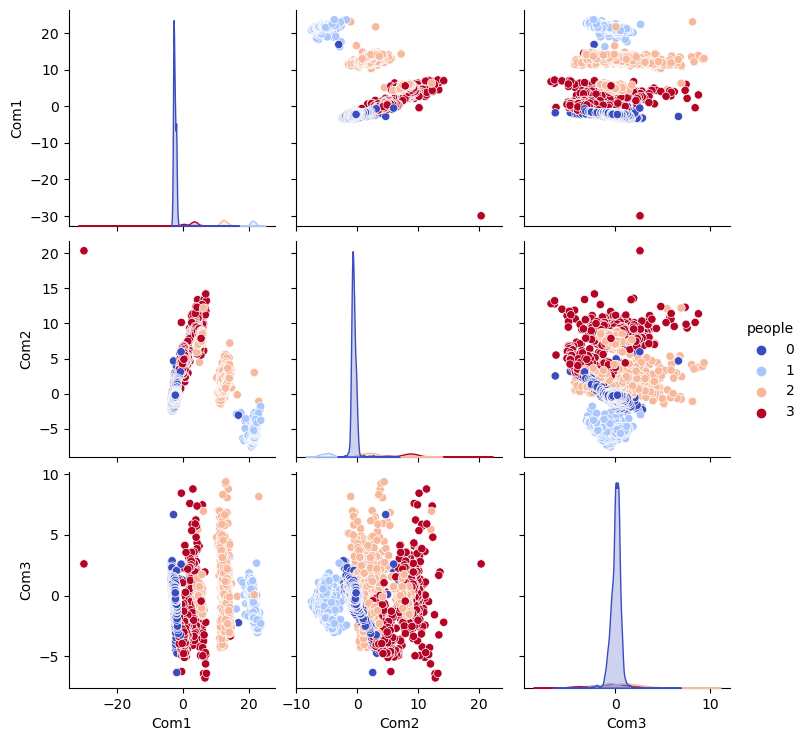

In [31]:
# n_components = 3
lda_model2 = LinearDiscriminantAnalysis(n_components = 3).fit(scaled_x, lbls)
lda_x2 = lda_model2.transform(scaled_x)

# create dataframe using the PC components
lda_df2 = pd.DataFrame(data = lda_x2, columns = ['Com1', 'Com2', 'Com3'])
lda_df2['people'] = lbls

# Vizualize LDA
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.set_zlabel('Component 3', fontsize=10)

for p in lda_df2.people.unique():
    ax.scatter(lda_df2.Com1[lda_df2.people==p], 
               lda_df2.Com2[lda_df2.people==p], 
               lda_df2.Com3[lda_df2.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# pair plot among the components 
sns.pairplot(lda_df2, hue="people", palette="coolwarm")



In [33]:
print("> L2 Regularization: ")
sklearn_LR(lda_df2)
print("> L1 Regularization: ")
sklearn_LR(lda_df2, regu='l1')


> L2 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.99      0.89      0.94       247
 #people = 3       0.88      0.95      0.91       229

    accuracy                           0.99      3343
   macro avg       0.97      0.96      0.96      3343
weighted avg       0.99      0.99      0.99      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.96      0.88      0.92       247
 #people = 3       0.86      0.91      0.89       229

    accuracy                           0.98      3343
   macro avg       0.95      0.95      0.95      3343
weighted avg       0.98      0.98      0.98      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA: n_components cannot be greater than min(#features, #class-1) 
So, 3 is the max.


## 3. t-SNE

In [34]:
from sklearn.manifold import TSNE

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10129 samples in 0.000s...
[t-SNE] Computed neighbors for 10129 samples in 1.691s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10129
[t-SNE] Computed conditional probabilities for sample 2000 / 10129
[t-SNE] Computed conditional probabilities for sample 3000 / 10129
[t-SNE] Computed conditional probabilities for sample 4000 / 10129
[t-SNE] Computed conditional probabilities for sample 5000 / 10129
[t-SNE] Computed conditional probabilities for sample 6000 / 10129
[t-SNE] Computed conditional probabilities for sample 7000 / 10129
[t-SNE] Computed conditional probabilities for sample 8000 / 10129
[t-SNE] Computed conditional probabilities for sample 9000 / 10129
[t-SNE] Computed conditional probabilities for sample 10000 / 10129
[t-SNE] Computed conditional probabilities for sample 10129 / 10129
[t-SNE] Mean sigma: 0.080502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.973656
[t-SNE] KL 

Text(0.5, 1.0, 't-SNE feature representation with 2 dimension')

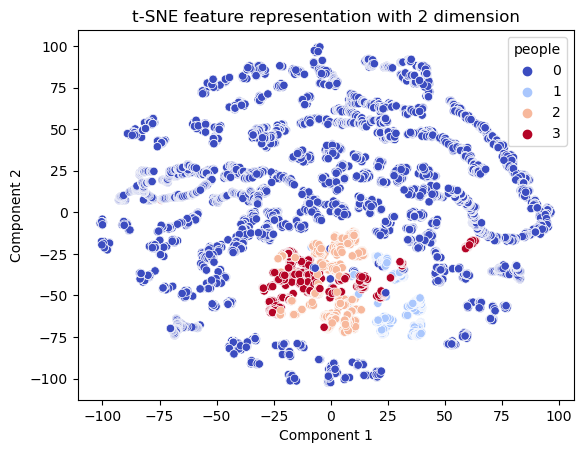

In [35]:
# n_components = 2
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_x = tsne.fit_transform(scaled_x) 

# create dataframe using the generated features
tsne_df = pd.DataFrame(data = tsne_x, columns = ['Com1', 'Com2'])
tsne_df['people'] = lbls

# Vizualize 
sns.scatterplot(data=tsne_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("t-SNE feature representation with 2 dimension")


In [36]:
print("> L2 Regularization: ")
sklearn_LR(tsne_df)
print("> L1 Regularization: ")
sklearn_LR(tsne_df, regu='l1')

> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.81      0.98      0.89      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.00      0.00      0.00       247
 #people = 3       0.00      0.00      0.00       229

    accuracy                           0.79      3343
   macro avg       0.20      0.24      0.22      3343
weighted avg       0.66      0.79      0.72      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.81      0.97      0.88      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.00      0.00      0.00       247
 #people = 3       0.00      0.00      0.00       229

    accuracy                           0.79      3343
   macro avg       0.20      0.24      0.22      3343
weighted avg       0.66      0.79      0.72      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10129 samples in 0.000s...
[t-SNE] Computed neighbors for 10129 samples in 1.785s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10129
[t-SNE] Computed conditional probabilities for sample 2000 / 10129
[t-SNE] Computed conditional probabilities for sample 3000 / 10129
[t-SNE] Computed conditional probabilities for sample 4000 / 10129
[t-SNE] Computed conditional probabilities for sample 5000 / 10129
[t-SNE] Computed conditional probabilities for sample 6000 / 10129
[t-SNE] Computed conditional probabilities for sample 7000 / 10129
[t-SNE] Computed conditional probabilities for sample 8000 / 10129
[t-SNE] Computed conditional probabilities for sample 9000 / 10129
[t-SNE] Computed conditional probabilities for sample 10000 / 10129
[t-SNE] Computed conditional probabilities for sample 10129 / 10129
[t-SNE] Mean sigma: 0.080502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.226501
[t-SNE] KL 

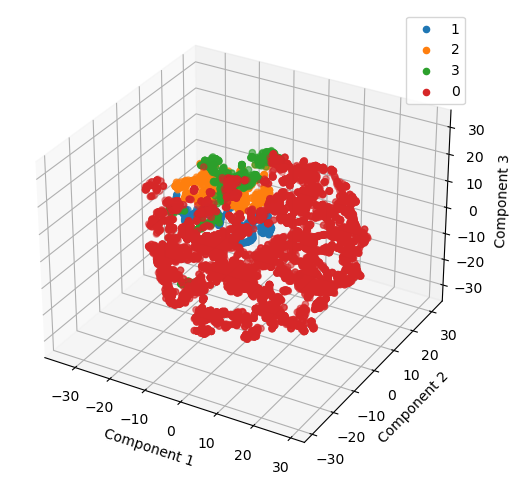

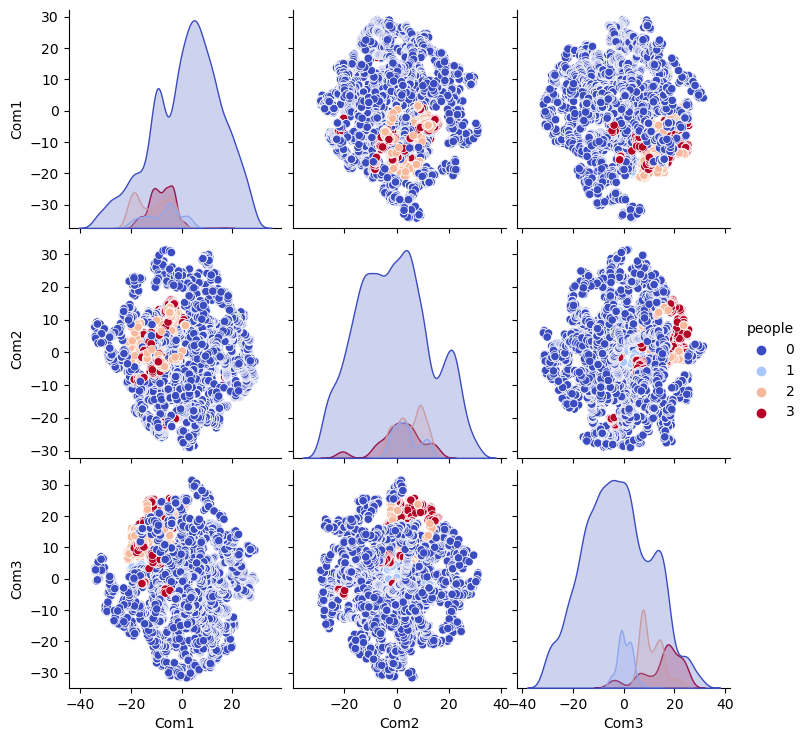

In [37]:
# n_components = 3
tsne2 = TSNE(n_components=3, verbose=1, random_state=123)
tsne2_x = tsne2.fit_transform(scaled_x) 

# create dataframe using the generated features
tsne_df2 = pd.DataFrame(data = tsne2_x, columns = ['Com1', 'Com2', 'Com3'])
tsne_df2['people'] = lbls

#visualize
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.set_zlabel('Component 3', fontsize=10)

for p in tsne_df2.people.unique():
    ax.scatter(tsne_df2.Com1[tsne_df2.people==p], 
               tsne_df2.Com2[tsne_df2.people==p], 
               tsne_df2.Com3[tsne_df2.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# paip plot among the components
sns.pairplot(tsne_df2, hue="people", palette="coolwarm")


In [38]:
print("> L2 Regularization: ")
sklearn_LR(tsne_df2)
print("> L1 Regularization: ")
sklearn_LR(tsne_df2, regu='l1')

> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.86      0.97      0.91      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.64      0.33      0.44       247
 #people = 3       0.58      0.39      0.47       229

    accuracy                           0.84      3343
   macro avg       0.52      0.42      0.45      3343
weighted avg       0.78      0.84      0.80      3343

> L1 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

              precision    recall  f1-score   support

 #people = 0       0.85      0.98      0.91      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.65      0.29      0.40       247
 #people = 3       0.65      0.31      0.42       229

    accuracy                           0.84      3343
   macro avg       0.54      0.39      0.43      3343
weighted avg       0.78      0.84      0.80      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Factor Analysis

In [39]:
from sklearn.decomposition import FactorAnalysis

Text(0.5, 1.0, 'Factor Analysis feature representation with 2 dimension')

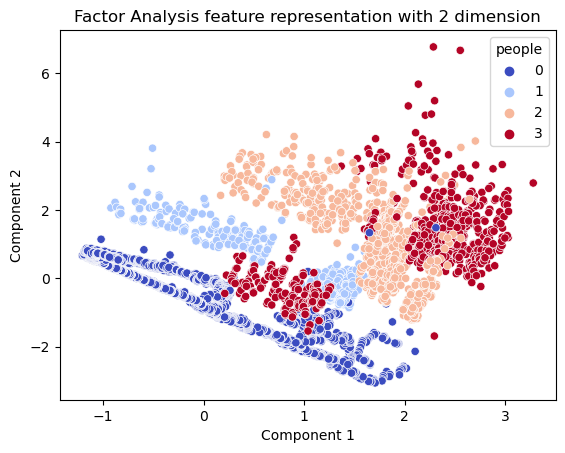

In [40]:
# n_components =2 
FA = FactorAnalysis(n_components=2, random_state=0)
fa_model = FA.fit(scaled_x)
fa_x = FA.fit_transform(scaled_x)

# create dataframe using the generated features
fa_df = pd.DataFrame(data = fa_x, columns = ['Com1', 'Com2'])
fa_df['people'] = lbls

# Vizualize 
sns.scatterplot(data=fa_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("Factor Analysis feature representation with 2 dimension")

In [43]:
print("> L2 Regularization: ")
sklearn_LR(fa_df)
print("> L1 Regularization: ")
sklearn_LR(fa_df, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.99      1.00      0.99      2716
 #people = 1       0.79      0.78      0.79       151
 #people = 2       0.75      0.61      0.67       247
 #people = 3       0.60      0.65      0.62       229

    accuracy                           0.94      3343
   macro avg       0.78      0.76      0.77      3343
weighted avg       0.93      0.94      0.93      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      1.00      0.99      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.50      0.49      0.50       247
 #people = 3       0.41      0.59      0.49       229

    accuracy                           0.89      3343
   macro avg       0.47      0.52      0.49      3343
weighted avg       0.86      0.89      0.87      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

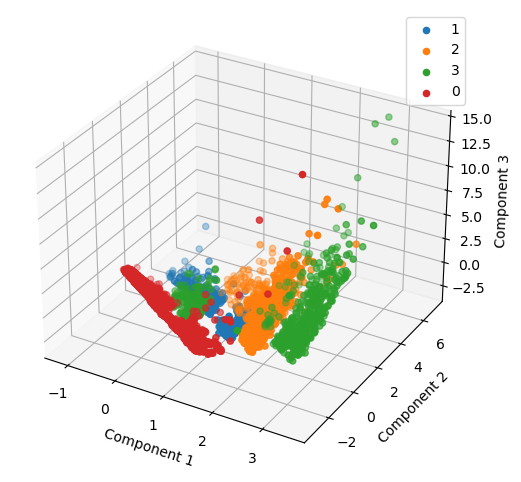

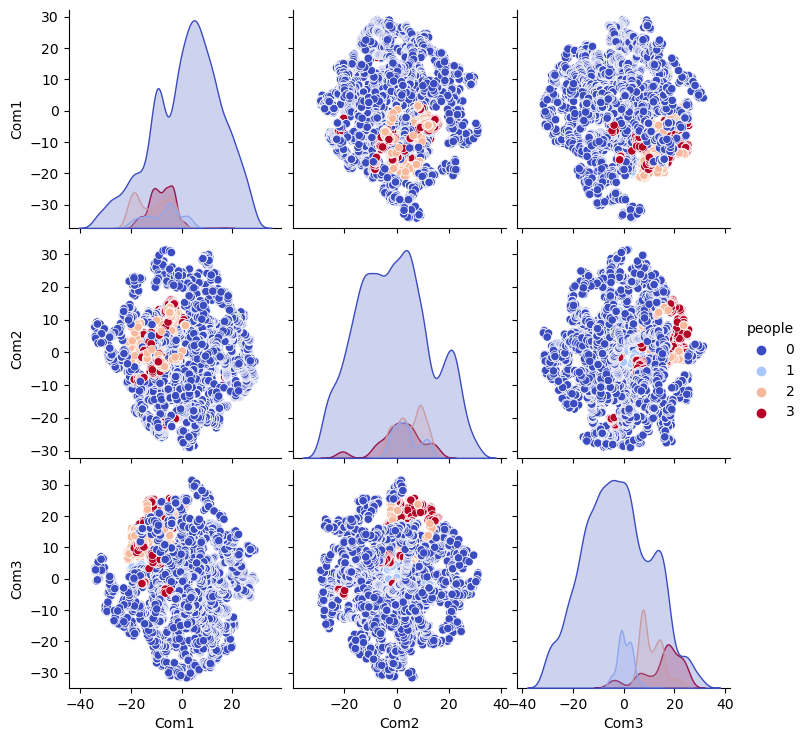

In [42]:
# n_components. = 3
FA2 = FactorAnalysis(n_components=3, random_state=0)
fa_model2 = FA2.fit(scaled_x)
fa_x2 = FA2.fit_transform(scaled_x)

# create dataframe using the generated features
fa_df2 = pd.DataFrame(data = fa_x2, columns = ['Com1', 'Com2', 'Com3'])
fa_df2['people'] = lbls


# visualize 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.set_zlabel('Component 3', fontsize=10)

for p in fa_df2.people.unique():
    ax.scatter(fa_df2.Com1[fa_df2.people==p], 
               fa_df2.Com2[fa_df2.people==p], 
               fa_df2.Com3[fa_df2.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# pairplot among the components
sns.pairplot(tsne_df2, hue="people", palette="coolwarm")


In [44]:
print("> L2 Regularization: ")
sklearn_LR(fa_df2)
print("> L1 Regularization: ")
sklearn_LR(fa_df2, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      1.00      0.99      2716
 #people = 1       0.87      0.81      0.84       151
 #people = 2       0.59      0.45      0.51       247
 #people = 3       0.53      0.61      0.56       229

    accuracy                           0.92      3343
   macro avg       0.74      0.72      0.73      3343
weighted avg       0.92      0.92      0.92      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      1.00      0.99      2716
 #people = 1       0.76      0.74      0.75       151
 #people = 2       0.58      0.41      0.48       247
 #people = 3       0.43      0.48      0.45       229

    accuracy                           0.91      3343
   macro avg       0.69      0.66      0.67      3343
weighted avg       0.90      0.91      0.90      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# n_components. = 9
FA3 = FactorAnalysis(n_components=9, random_state=0)
fa_model3 = FA3.fit(scaled_x)
fa_x3 = FA3.fit_transform(scaled_x)

# create dataframe using the generated features
fa_df3 = pd.DataFrame(data = fa_x3)
fa_df3['people'] = lbls

print("> L2 Regularization: ")
sklearn_LR(fa_df3)
print("> L1 Regularization: ")
sklearn_LR(fa_df3, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.97      0.91      0.94       247
 #people = 3       0.90      0.90      0.90       229

    accuracy                           0.99      3343
   macro avg       0.96      0.95      0.96      3343
weighted avg       0.99      0.99      0.99      3343

> L1 Regularization: 


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2716
 #people = 1       1.00      0.99      1.00       151
 #people = 2       0.98      0.88      0.93       247
 #people = 3       0.87      0.91      0.89       229

    accuracy                           0.98      3343
   macro avg       0.96      0.94      0.95      3343
weighted avg       0.98      0.98      0.98      3343



## Singular Value Decomposition (SVD)

In [47]:
from sklearn.decomposition import TruncatedSVD 

Text(0.5, 1.0, 'SVD feature representation with 2 dimension')

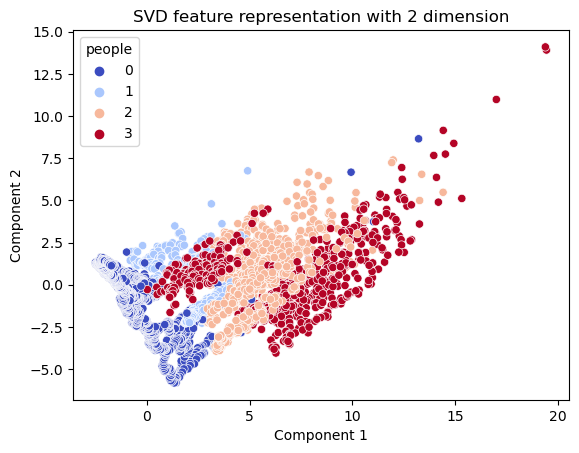

In [48]:
# n_components = 2
svd = TruncatedSVD(n_components=2, random_state=42)
svd_x = svd.fit_transform(scaled_x)

# create dataframe using the generated features
svd_df = pd.DataFrame(data = svd_x, columns = ['Com1', 'Com2'])
svd_df['people'] = lbls


# Vizualize
sns.scatterplot(data=svd_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("SVD feature representation with 2 dimension")

In [49]:
print("> L2 Regularization: ")
sklearn_LR(svd_df)
print("> L1 Regularization: ")
sklearn_LR(svd_df, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      0.99      0.99      2716
 #people = 1       0.59      0.58      0.59       151
 #people = 2       0.75      0.67      0.71       247
 #people = 3       0.69      0.70      0.70       229

    accuracy                           0.93      3343
   macro avg       0.75      0.74      0.75      3343
weighted avg       0.93      0.93      0.93      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.97      1.00      0.98      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.47      0.46      0.46       247
 #people = 3       0.53      0.68      0.59       229

    accuracy                           0.89      3343
   macro avg       0.49      0.53      0.51      3343
weighted avg       0.86      0.89      0.87      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

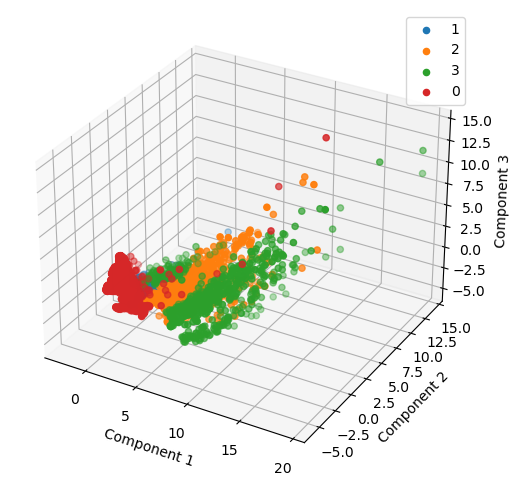

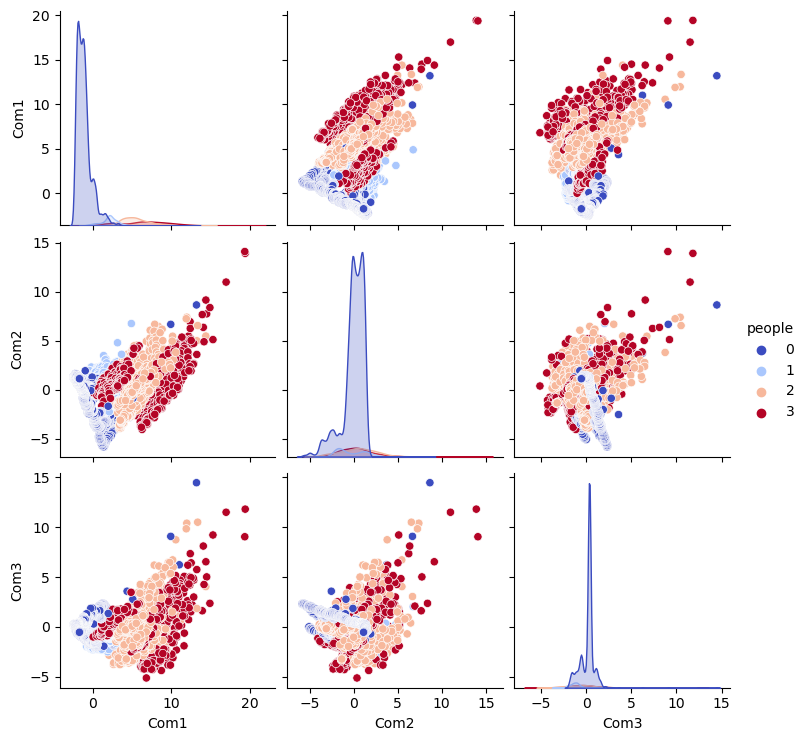

In [50]:
# n_components = 3
svd2 = TruncatedSVD(n_components=3, random_state=42)
svd_x2 = svd2.fit_transform(scaled_x)

# create dataframe using the generated features
svd_df2 = pd.DataFrame(data = svd_x2, columns = ['Com1', 'Com2', 'Com3'])
svd_df2['people'] = lbls


# visualize 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.set_zlabel('Component 3', fontsize=10)

for p in svd_df2.people.unique():
    ax.scatter(svd_df2.Com1[svd_df2.people==p], 
               svd_df2.Com2[svd_df2.people==p], 
               svd_df2.Com3[svd_df2.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# pairplot among the components
sns.pairplot(svd_df2, hue="people", palette="coolwarm")

In [51]:
print("> L2 Regularization: ")
sklearn_LR(svd_df2)
print("> L1 Regularization: ")
sklearn_LR(svd_df2, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.98      0.99      0.99      2716
 #people = 1       0.67      0.64      0.66       151
 #people = 2       0.75      0.68      0.71       247
 #people = 3       0.70      0.71      0.70       229

    accuracy                           0.93      3343
   macro avg       0.78      0.76      0.76      3343
weighted avg       0.93      0.93      0.93      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.96      0.99      0.98      2716
 #people = 1       0.49      0.13      0.21       151
 #people = 2       0.49      0.38      0.43       247
 #people = 3       0.52      0.67      0.58       229

    accuracy                           0.89      3343
   macro avg       0.61      0.54      0.55      3343
weighted avg       0.87      0.89      0.87      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Independent Component Analysis (ICA) 

In [52]:
from sklearn.decomposition import FastICA 

Text(0.5, 1.0, 'ICA feature representation with 2 dimension')

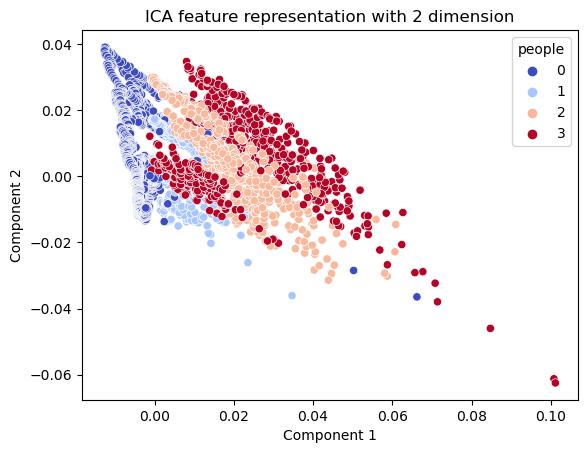

In [53]:
# n_components = 2
ICA = FastICA(n_components=2, random_state=12) 
ica_x=ICA.fit_transform(scaled_x)

# create dataframe using the generated features
ica_df = pd.DataFrame(data = ica_x, columns = ['Com1', 'Com2'])
ica_df['people'] = lbls


# Vizualize
sns.scatterplot(data=ica_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("ICA feature representation with 2 dimension")



In [54]:
print("> L2 Regularization: ")
sklearn_LR(ica_df)
print("> L1 Regularization: ")
sklearn_LR(ica_df, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.81      1.00      0.90      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.00      0.00      0.00       247
 #people = 3       0.00      0.00      0.00       229

    accuracy                           0.81      3343
   macro avg       0.20      0.25      0.22      3343
weighted avg       0.66      0.81      0.73      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.93      1.00      0.96      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.63      0.36      0.45       247
 #people = 3       0.52      0.67      0.59       229

    accuracy                           0.88      3343
   macro avg       0.52      0.51      0.50      3343
weighted avg       0.84      0.88      0.86      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

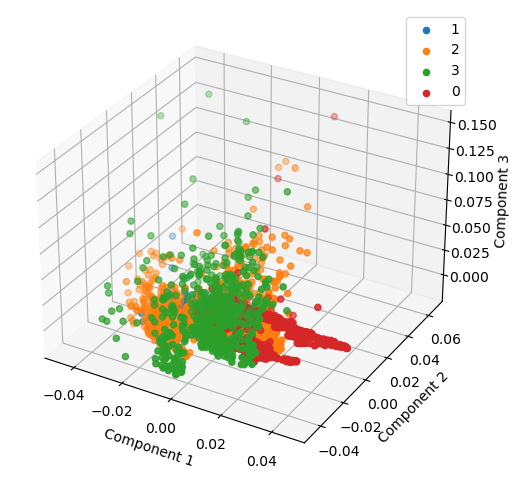

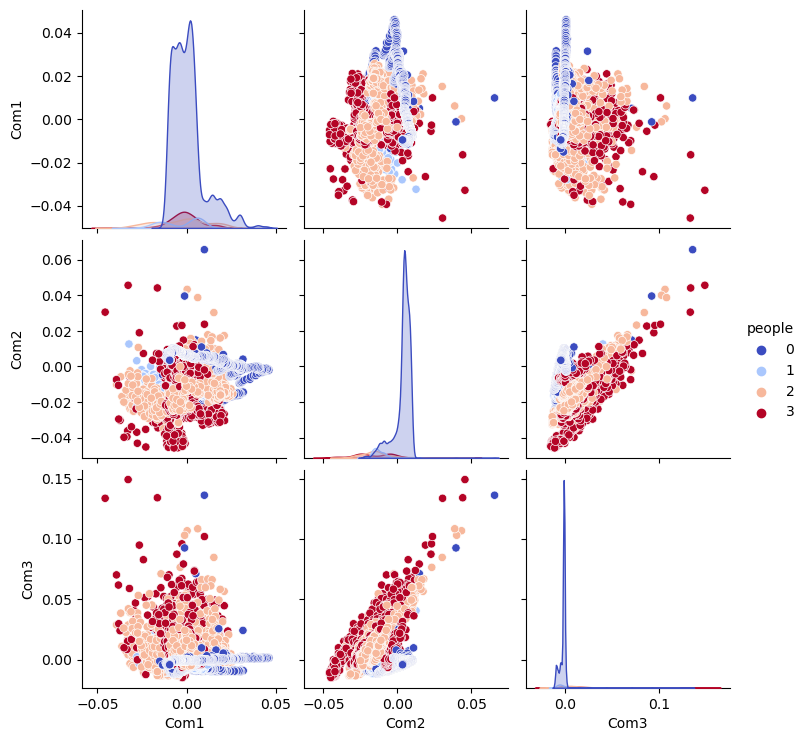

In [55]:
# n_components = 3
ICA2 = FastICA(n_components=3, random_state=12) 
ica_x2=ICA2.fit_transform(scaled_x)

# create dataframe using the generated features
ica_df2 = pd.DataFrame(data = ica_x2, columns = ['Com1', 'Com2', 'Com3'])
ica_df2['people'] = lbls


# visualize 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.set_zlabel('Component 3', fontsize=10)

for p in ica_df2.people.unique():
    ax.scatter(ica_df2.Com1[ica_df2.people==p], 
               ica_df2.Com2[ica_df2.people==p], 
               ica_df2.Com3[ica_df2.people==p],
               label=p
              ) 
ax.legend()
plt.show()

# pairplot among the components
sns.pairplot(ica_df2, hue="people", palette="coolwarm")

In [56]:
print("> L2 Regularization: ")
sklearn_LR(ica_df)
print("> L1 Regularization: ")
sklearn_LR(ica_df, regu='l1')


> L2 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.81      1.00      0.90      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.00      0.00      0.00       247
 #people = 3       0.00      0.00      0.00       229

    accuracy                           0.81      3343
   macro avg       0.20      0.25      0.22      3343
weighted avg       0.66      0.81      0.73      3343

> L1 Regularization: 
              precision    recall  f1-score   support

 #people = 0       0.93      1.00      0.96      2716
 #people = 1       0.00      0.00      0.00       151
 #people = 2       0.63      0.36      0.45       247
 #people = 3       0.52      0.67      0.59       229

    accuracy                           0.88      3343
   macro avg       0.52      0.51      0.50      3343
weighted avg       0.84      0.88      0.86      3343



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

/var/folders/bg/yqgwsftd079fpjycqm6w_4_40000gp/T/ipykernel_2195/1273476162.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/bg/yqgwsftd079fpjycqm6w_4_40000gp/T/ipykernel_2195/1273476162.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/bg/yqgwsftd079fpjycqm6w_4_40000gp/T/ipykernel_2195/1273476162.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


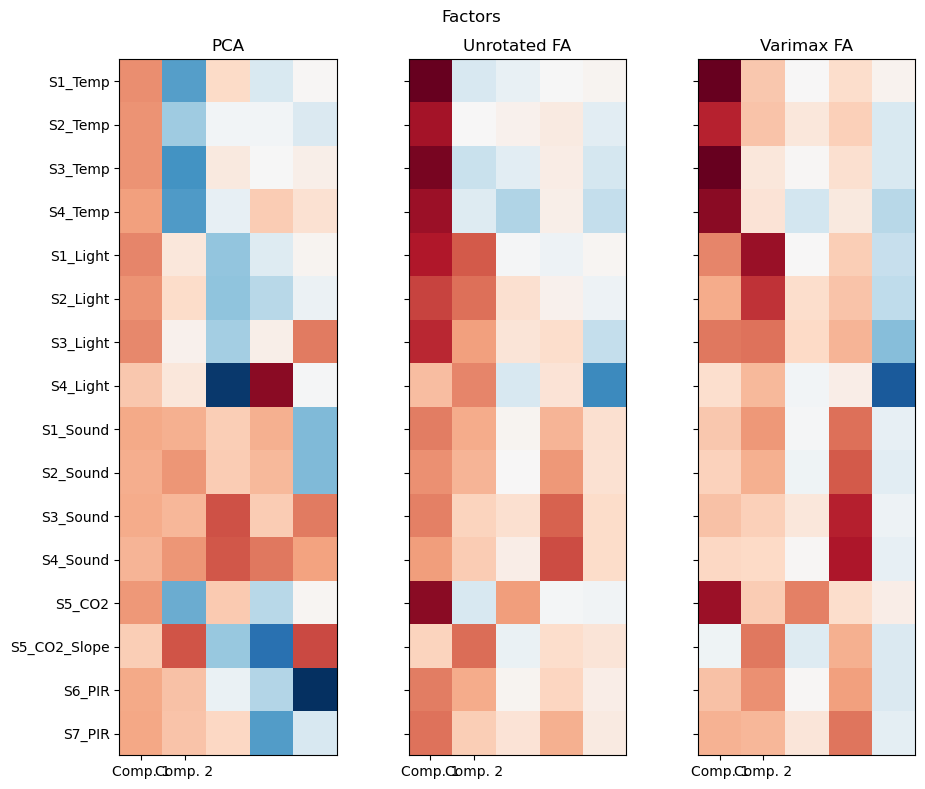

In [57]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 8))
feature_names = X.columns

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=5)
    fa.fit(scaled_x)

    components = fa.components_.T
    #print("\n\n %s :\n" % method)
    #print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()